<a href="https://colab.research.google.com/github/Sirabhop/Kaggle_Challenges/blob/master/Challenge_2_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from scipy.stats import norm, skew

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('/content/drive/My Drive/My Project/Kaggle/Challenge#2_House Price')

In [3]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

###**1. Data Exploration**

"*Keep calm and work smart! (Marcelino, 2017)*"

####**Top-down Approach**

First, in my opinions, sale price would depend on
1. **Properties**, such as area, facilities,...
2. **Location**, land curve, road connection,...
3. **Artistry**, emotional attachment of the house.


If we categorize 80 features (dependent variable is excluded) it would be like this

In [4]:
total_category = ['Properties', 'Facilities', 'Basement', 'Appliance', 'Room', 'Garage', 'Material', 'Location', 'History', 'Sales']

col_dict = {#1
'Properties' : ['MSSubClass', 'LotArea', 'LotConfig', 'BldgType',
              'HouseStyle', 'OverallCond', 'RoofStyle', 'MasVnrArea', 'ExterCond',
              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'] 
#2
,'Facilities' : ['PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
              'MiscVal'],
#3
'Basement' : ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
            'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'],
#4
'Appliance' : ['Utilities', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
             'Functional', 'Fireplaces', 'FireplaceQu'],
#5
'Room' : ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'KitchenQual', 'TotRmsAbvGrd'],
#6
'Garage' : ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
          'GarageQual', 'GarageCond'],
#7
'Material' : ['RoofMatl', 'Exterior1st', 'Exterior2nd', 'OverallQual', 'RoofMatl',
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation'],
#8
'Location' : ['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope',
            'Neighborhood', 'Condition1', 'Condition2', ],
#9
'History' : ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold'],
#10
'Sales' : ['SaleType', 'SaleCondition']}

####**Bottom-up Approach**

In [ ]:
def get_heatmap(data, list_col, y):
  corrmat = data[list_col+[y]].corr()
  sns.heatmap(corrmat, square = True)

['MSSubClass', 'LotArea', 'LotConfig', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'MasVnrArea', 'ExterCond', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']


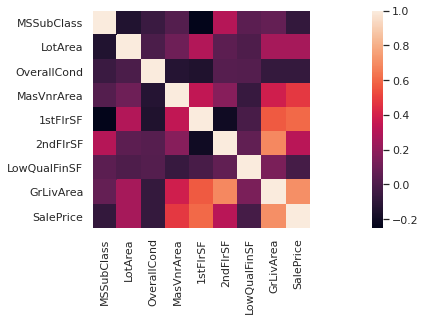

['PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']


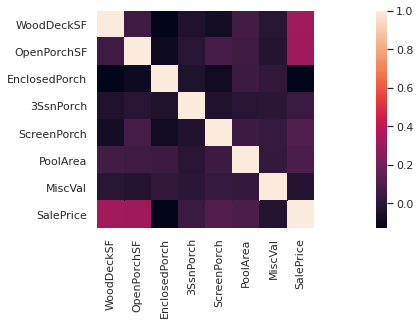

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']


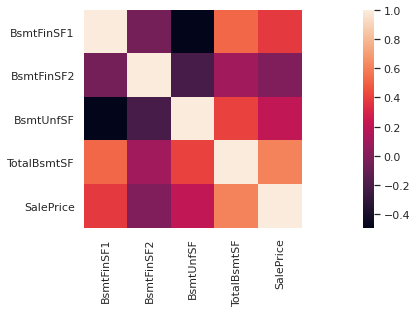

['Utilities', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'Fireplaces', 'FireplaceQu']


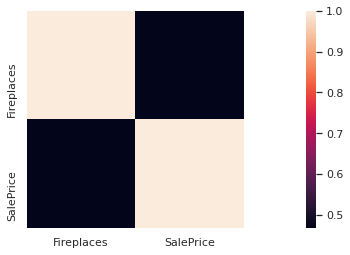

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd']


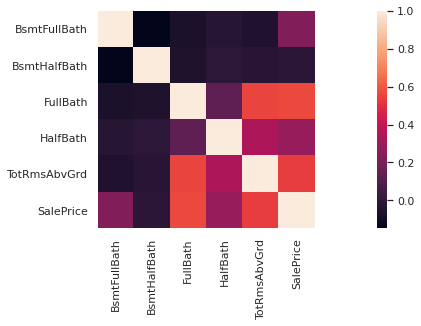

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']


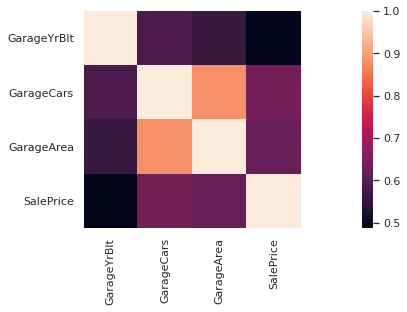

['RoofMatl', 'Exterior1st', 'Exterior2nd', 'OverallQual', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation']


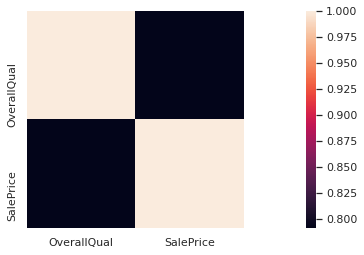

['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']


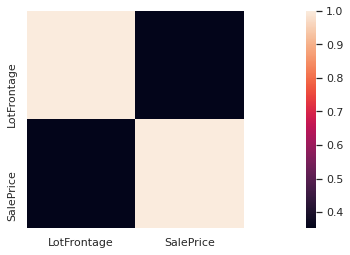

['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']


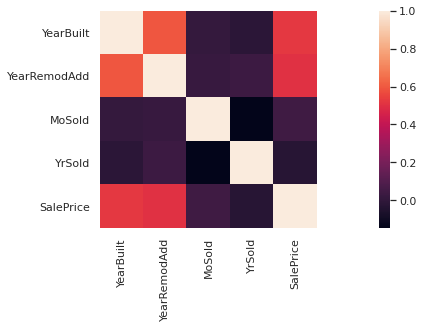

['SaleType', 'SaleCondition']


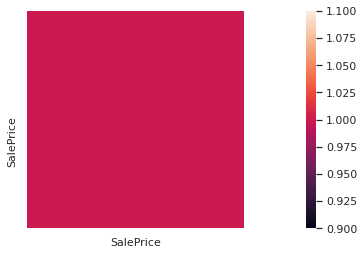

In [ ]:
for i in total_category:
  print(i)
  get_heatmap(df, i, 'SalePrice')
  plt.show()

####**Top meet bottom**

In [5]:
corr = df.corr().SalePrice
corr = pd.DataFrame(corr.reset_index())
corr['SalePrice'] = abs(corr['SalePrice'])

In [6]:
corr['group'] = None

#Fill group name to each column name
for x in total_category: #group name
  for column in col_dict[x]: #column name
    for i in range(len(corr)): #column name x index
      if column == corr.iloc[i, 0]:
        corr.iloc[i, 2] = x 

In [7]:
corr_rank = pd.DataFrame(total_category, columns = ['group'])
corr_rank['rank'] = None

#Rank columns in each group, and select only top three.
for i in range(len(corr_rank)): #group name
  if corr_rank.iloc[i, 0] in corr['group'].values:
    corr_rank.iloc[i, 1] = corr[corr['group'] == corr_rank.iloc[i, 0]].sort_values('SalePrice', ascending = False)['index'].values[0:3]

In [8]:
corr_rank.drop(labels = 9, inplace  =True)
corr_rank

,group,rank
0,Properties,"[GrLivArea, 1stFlrSF, MasVnrArea]"
1,Facilities,"[WoodDeckSF, OpenPorchSF, EnclosedPorch]"
2,Basement,"[TotalBsmtSF, BsmtFinSF1, BsmtUnfSF]"
3,Appliance,[Fireplaces]
4,Room,"[FullBath, TotRmsAbvGrd, HalfBath]"
5,Garage,"[GarageCars, GarageArea, GarageYrBlt]"
6,Material,[OverallQual]
7,Location,[LotFrontage]
8,History,"[YearBuilt, YearRemodAdd, MoSold]"


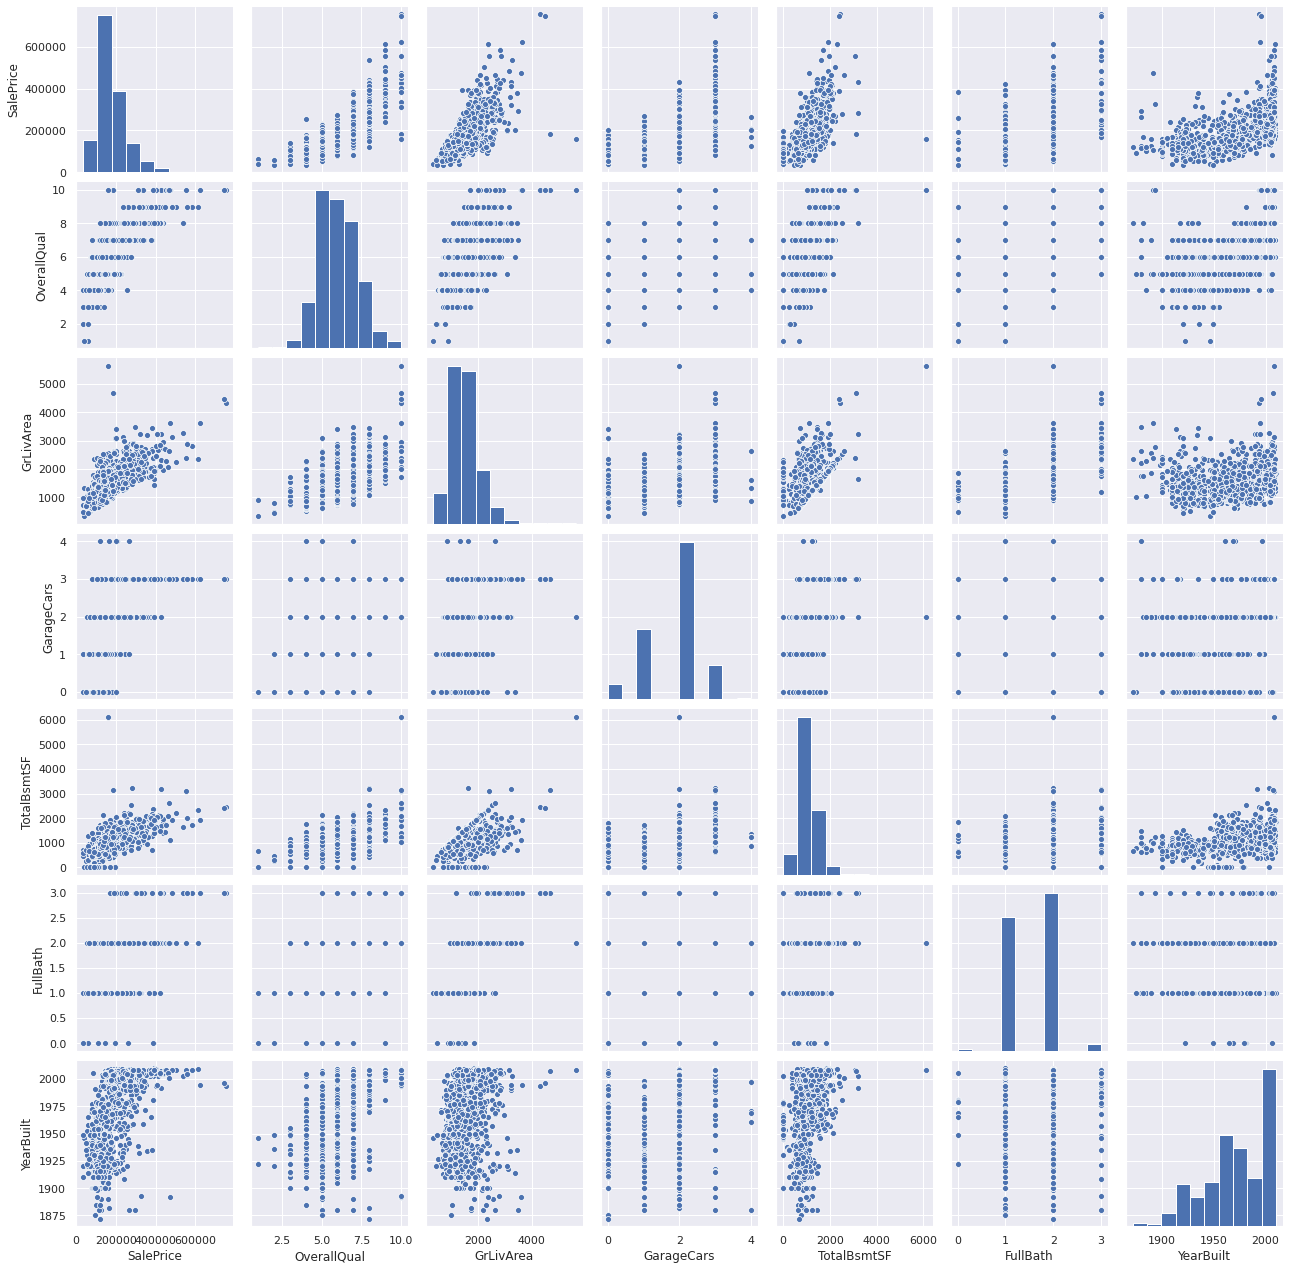

In [9]:
sns.set()
sns.pairplot(df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']])
plt.show()

###**2. Data Cleansing**

In [10]:
df = df[['GrLivArea', '1stFlrSF', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces', 
    'FullBath', 'TotRmsAbvGrd', 'HalfBath', 'GarageCars', 'GarageArea', 
    'GarageYrBlt', 'OverallQual', 'LotFrontage', 'YearBuilt', 'YearRemodAdd', 
    'MoSold', 'SalePrice']]

####**Missing Data**

In [11]:
#If missing more than 15% considered delete
(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
SalePrice         0.000000
Fireplaces        0.000000
1stFlrSF          0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
TotalBsmtSF       0.000000
BsmtFinSF1        0.000000
BsmtUnfSF         0.000000
FullBath          0.000000
MoSold            0.000000
TotRmsAbvGrd      0.000000
HalfBath          0.000000
GarageCars        0.000000
GarageArea        0.000000
OverallQual       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
GrLivArea         0.000000
dtype: float64

In [12]:
df.drop(['LotFrontage'], axis = 1, inplace = True)

In [13]:
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:, np.newaxis])

In [14]:
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]
print(low_range)
print(high_range)

[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


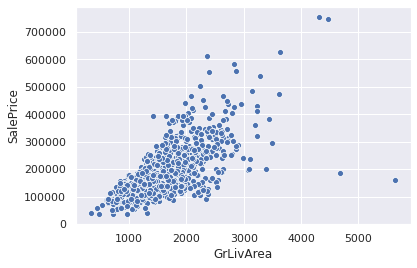

In [15]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df)

In [16]:
df.drop([523, 1298], axis = 0, inplace = True)

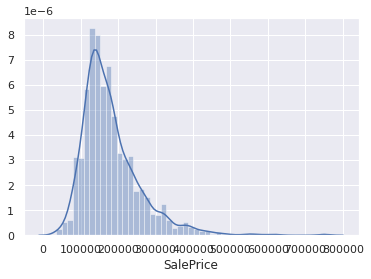

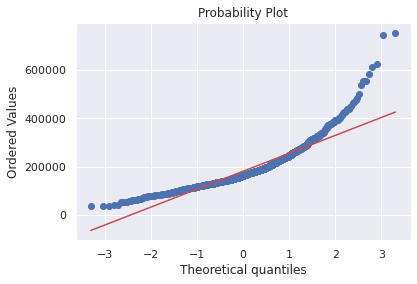

In [17]:
sns.distplot(df['SalePrice'])
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot = plt)

In [18]:
df['SalePrice'] = np.log(df['SalePrice'])

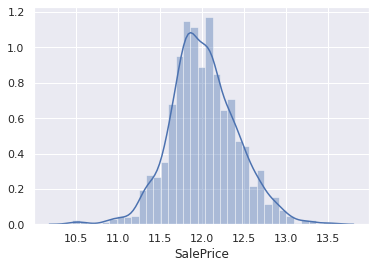

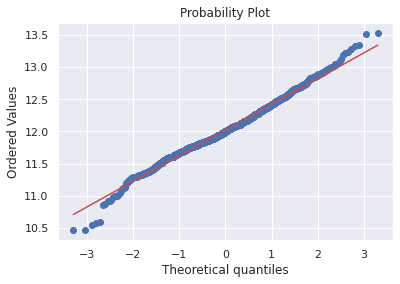

In [19]:
sns.distplot(df['SalePrice'])
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot = plt)

In [20]:
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index = df.index)
df['HasBsmt'] = 0
df.loc[df['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [21]:
df.loc[df['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [25]:
label = LabelEncoder()
for c in cols:
  if c in df.columns:
    df[c] = label.fit_transform(df[c])